In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv('completeddata.csv')
df.head()


,Unnamed: 0,DATE,Scheduled Generation,Gross Gen.,Net Variation,Total Energy Export,Total Energy Import,Net Generation,Aux. Consumption and losses,Aux. Consumption and losses percentage,...,Discharge max.,Discharge min.,Discharge avg.,Reserv lvl(M) max.,Reserv lvl(M) min.,Reserv lvl(M) avg.,Reserv lvl(E) max.,Reserv lvl(E) min.,Reserv lvl(E) avg.,MonthYear
0,2,2021-03-01,285000.0,296968.0,4.20,338480.0,44505.0,293975.0,2993.0,1.01,...,5.28,4.98,5.13,1750.8,1745.8,1748.30,1749.4,1746.2,1747.80,2021-03
1,3,2021-03-02,285000.0,292787.0,2.73,339785.0,50163.0,289622.0,3165.0,1.08,...,5.28,4.98,5.13,1750.5,1745.5,1748.00,1748.9,1746.1,1747.50,2021-03
2,4,2021-03-03,285000.0,292454.0,2.62,356833.0,67580.0,289253.0,3201.0,1.09,...,5.28,4.98,5.13,1750.4,1745.7,1748.05,1748.7,1745.7,1747.20,2021-03
3,5,2021-03-04,273250.0,282621.0,3.43,300471.0,20986.0,279485.0,3136.0,1.11,...,5.28,4.98,5.13,1750.8,1749.6,1750.20,1751.3,1745.3,1748.30,2021-03
4,6,2021-03-05,273250.0,283357.0,3.70,302266.0,21883.0,280383.0,2974.0,1.05,...,5.28,4.98,5.13,1750.6,1749.3,1749.95,1751.3,1745.2,1748.25,2021-03


In [11]:
df.columns

Index(['Unnamed: 0', 'DATE', 'Scheduled Generation', 'Gross Gen.',
       'Net Variation', 'Total Energy Export', 'Total Energy Import',
       'Net Generation', 'Aux. Consumption and losses',
       'Aux. Consumption and losses percentage', 'Commulative Gross Gen.',
       'Load max.', 'Load min.', 'Load avg.', 'Discharge max.',
       'Discharge min.', 'Discharge avg.', 'Reserv lvl(M) max.',
       'Reserv lvl(M) min.', 'Reserv lvl(M) avg.', 'Reserv lvl(E) max.',
       'Reserv lvl(E) min.', 'Reserv lvl(E) avg.', 'MonthYear'],
      dtype='object')

In [12]:
df.shape

(828, 24)

In [13]:
df.columns

Index(['Unnamed: 0', 'DATE', 'Scheduled Generation', 'Gross Gen.',
       'Net Variation', 'Total Energy Export', 'Total Energy Import',
       'Net Generation', 'Aux. Consumption and losses',
       'Aux. Consumption and losses percentage', 'Commulative Gross Gen.',
       'Load max.', 'Load min.', 'Load avg.', 'Discharge max.',
       'Discharge min.', 'Discharge avg.', 'Reserv lvl(M) max.',
       'Reserv lvl(M) min.', 'Reserv lvl(M) avg.', 'Reserv lvl(E) max.',
       'Reserv lvl(E) min.', 'Reserv lvl(E) avg.', 'MonthYear'],
      dtype='object')

In [14]:
target=df['Commulative Gross Gen.']

In [15]:
df = df.drop(['Gross Gen.', 'MonthYear', 'Unnamed: 0'], axis=1)
df.columns

Index(['DATE', 'Scheduled Generation', 'Net Variation', 'Total Energy Export',
       'Total Energy Import', 'Net Generation', 'Aux. Consumption and losses',
       'Aux. Consumption and losses percentage', 'Commulative Gross Gen.',
       'Load max.', 'Load min.', 'Load avg.', 'Discharge max.',
       'Discharge min.', 'Discharge avg.', 'Reserv lvl(M) max.',
       'Reserv lvl(M) min.', 'Reserv lvl(M) avg.', 'Reserv lvl(E) max.',
       'Reserv lvl(E) min.', 'Reserv lvl(E) avg.'],
      dtype='object')

In [16]:
df['month'] = pd.DatetimeIndex(df['DATE']).month
df['year'] = pd.DatetimeIndex(df['DATE']).year
df['day'] = pd.DatetimeIndex(df['DATE']).day

# df = df.drop(['DATE', 'Commulative Gross Gen.', 'MonthYear', 'Unnamed: 0'], axis=1)

for col in df.columns:
    print(f'{col}: has Dtype {df[col].dtype}')


DATE: has Dtype object
Scheduled Generation: has Dtype float64
Net Variation: has Dtype float64
Total Energy Export: has Dtype float64
Total Energy Import: has Dtype float64
Net Generation: has Dtype float64
Aux. Consumption and losses: has Dtype float64
Aux. Consumption and losses percentage: has Dtype float64
Commulative Gross Gen.: has Dtype float64
Load max.: has Dtype float64
Load min.: has Dtype float64
Load avg.: has Dtype float64
Discharge max.: has Dtype float64
Discharge min.: has Dtype float64
Discharge avg.: has Dtype float64
Reserv lvl(M) max.: has Dtype float64
Reserv lvl(M) min.: has Dtype float64
Reserv lvl(M) avg.: has Dtype float64
Reserv lvl(E) max.: has Dtype float64
Reserv lvl(E) min.: has Dtype float64
Reserv lvl(E) avg.: has Dtype float64
month: has Dtype int32
year: has Dtype int32
day: has Dtype int32


In [17]:
X = df[['month', 'year', 'day']]
y = df['Commulative Gross Gen.']


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.utils import all_estimators
regressors =all_estimators(type_filter='regressor')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
for name, RegressorClass in regressors:
    try:
        reg = RegressorClass()
        reg.fit(X_train, y_train)
        print(name, 'was successful')
        print(f"MSE: {mean_squared_error(y_test, reg.predict(X_test))}\nMAE: {mean_absolute_error(y_test, reg.predict(X_test))}\nR2: {r2_score(y_test, reg.predict(X_test))}\nRMSE: {np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))}\n")
    except Exception as e:
        print(name, 'was not successful')
        print(e)

ARDRegression was successful
MSE: 327494163705429.56
MAE: 13864126.692312151
R2: -0.00039647371166440237
RMSE: 18096799.819455083

AdaBoostRegressor was successful
MSE: 43596450975787.44
MAE: 5461685.223546984
R2: 0.8668259143031619
RMSE: 6602760.860109007

BaggingRegressor was successful
MSE: 17199803342289.477
MAE: 1372043.494621966
R2: 0.9474597580076655
RMSE: 4147264.561405442

BayesianRidge was successful
MSE: 327494163705392.1
MAE: 13864126.692311402
R2: -0.00039647371154982736
RMSE: 18096799.819454048

CCA was not successful
`n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
DecisionTreeRegressor was successful
MSE: 18146279559243.22
MAE: 1300947.5542605203
R2: 0.9445685569579144
RMSE: 4259845.01587126

DummyRegressor was successful
MSE: 327494163734630.2
MAE: 13864126.692840852
R2: -0.00039647380086349493
RMSE: 18096799.820261873

ElasticNet was successful
MSE: 224501341149954.06
MAE: 11277084.989930168
R2: 0.31421571765179546
RMSE: 14983368.818458486

Elast

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


MLPRegressor was successful
MSE: 607091703366242.8
MAE: 16725602.502269877
R2: -0.854483122372443
RMSE: 24639230.98163258

MultiOutputRegressor was not successful
MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet was not successful
For mono-task outputs, use ElasticNet
MultiTaskElasticNetCV was not successful
For mono-task outputs, use ElasticNetCVCV
MultiTaskLasso was not successful
For mono-task outputs, use ElasticNet
MultiTaskLassoCV was not successful
For mono-task outputs, use LassoCVCV
NuSVR was successful
MSE: 333222078821760.75
MAE: 12943476.977090744
R2: -0.017893536924221687
RMSE: 18254371.498952266

OrthogonalMatchingPursuit was successful
MSE: 254454637765353.84
MAE: 12087263.000414945
R2: 0.2227173777392767
RMSE: 15951634.32897563

OrthogonalMatchingPursuitCV was successful
MSE: 222296052134316.53
MAE: 11329212.709381003
R2: 0.32095221435694965
RMSE: 14909595.97488532

PLSCanonical was not successful
`n_components` upp

In [21]:
# from sklearn.linear_model import RidgeCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Initialize RidgeCV with cross-validated alphas
# ridge_regressor = RidgeCV(alphas=[0.1, 1.0, 10.0])

# # Standardize the features (important for Ridge regression)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Fit the RidgeCV on the training data
# ridge_regressor.fit(X_train_scaled, y_train)

# # Predict on the testing data
# y_pred_ridge = ridge_regressor.predict(X_test_scaled)

# # Evaluate performance for RidgeCV
# print("RidgeCV")
# print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
# print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
# print(f"R2: {r2_score(y_test, y_pred_ridge)}")
# print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")


In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X and target are your feature matrix and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Initialize BaggingRegressor
bagging_regressor = BaggingRegressor()

# Fit the BaggingRegressor on the training data
bagging_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = bagging_regressor.predict(X_test)

# Evaluate performance
print("BaggingRegressor")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


BaggingRegressor
MSE: 19577333318804.543
MAE: 1538603.9398201504
R2: 0.9401971168120538
RMSE: 4424628.042988986


In [23]:
from sklearn.model_selection import GridSearchCV 
bagging_regressor = BaggingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(bagging_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_bagging_regressor = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_bagging_regressor.predict(X_test)

# Evaluate performance
print("Best BaggingRegressor after Hyperparameter Tuning")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best BaggingRegressor after Hyperparameter Tuning
MSE: 17974368161920.957
MAE: 1408410.4905360574
R2: 0.9450936947305274
RMSE: 4239618.869889244
Best Hyperparameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


In [24]:
def predict_commulative_gross_gen(model, input_date):
    input_data = pd.DataFrame({
        'month': [input_date.month],
        'year': [input_date.year],
        'day': [input_date.day],
    })
    predicted_value = model.predict(input_data)
    return predicted_value[0]

In [25]:
from datetime import datetime
user_input_date = input("Enter a date in the format YYYY-MM-DD: ")
user_input_date = datetime.strptime(user_input_date, '%Y-%m-%d')

# Predict Commulative Gross Gen. for the user-input date
predicted_value = predict_commulative_gross_gen(best_bagging_regressor, user_input_date)

# Display the predicted value
print(f"Predicted Commulative Gross Gen. for {user_input_date}: {predicted_value}")

Predicted Commulative Gross Gen. for 2024-12-10 00:00:00: 5763843.98



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


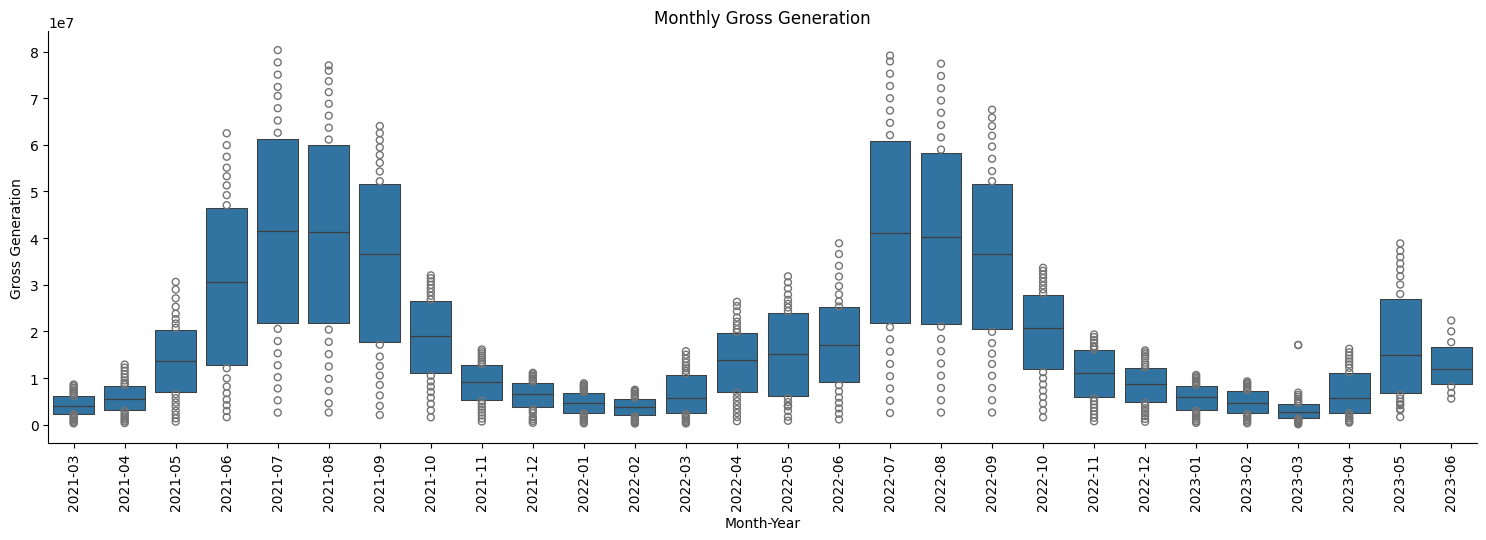

In [28]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
df['DATE'] = pd.to_datetime(df['DATE'])
df['MonthYear'] = df['DATE'].dt.to_period('M')
sns.catplot(x='MonthYear', y='Commulative Gross Gen.', data=df, kind='boxen', aspect=3)
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Gross Generation')
plt.title('Monthly Gross Generation')
plt.show()